# 1. Selección de un Conjunto de Datos

## Introducción

Para entender las razones que subyacen al funcionamiento de la felicidad en diferentes países, hemos decidido trabajar con la base de datos **World Happiness Report**. Este conjunto de datos, disponible en [Kaggle](https://www.kaggle.com/datasets), proporciona información detallada sobre los niveles de felicidad de los países en todo el mundo, basándose en varios indicadores sociales, económicos y políticos.

## ¿Por qué la base de datos World Happiness Report?

El **World Happiness Report** clasifica los países según su nivel de felicidad, utilizando una serie de variables que reflejan diferentes aspectos del bienestar. Los datos que hemos utilizado provienen de las ediciones más recientes del informe y contienen los siguientes campos:

- **Country**: Nombre del país.
- **Region**: Región geográfica del país.
- **Happiness Rank**: Posición del país en el ranking global de felicidad.
- **Happiness Score**: Índice que refleja el nivel de felicidad en el país.
- **Lower Confidence Interval**: Intervalo inferior de confianza para la puntuación de felicidad.
- **Upper Confidence Interval**: Intervalo superior de confianza para la puntuación de felicidad.
- **Economy (GDP per Capita)**: Producto Interno Bruto (PIB) per cápita.
- **Family**: Medida del apoyo social basado en la familia.
- **Health (Life Expectancy)**: Esperanza de vida saludable.
- **Freedom**: Libertad para tomar decisiones en la vida.
- **Trust (Government Corruption)**: Confianza en el gobierno y la corrupción.
- **Generosity**: Nivel de generosidad en la sociedad.
- **Dystopia Residual**: Valor residual relacionado con una hipotética sociedad distópica.

## Objetivo

El objetivo principal de este análisis es comprender mejor cómo influyen los distintos factores en los niveles de felicidad de los países. Al explorar la relación entre estos indicadores y los niveles de felicidad, buscamos identificar patrones y posibles factores clave que contribuyen al bienestar en difentes regiones del mundo.

egiones del mundo.



# User
Con matplotlib genera al menos tres tipos de visualizaciones que sean relevantes para el analisis

# 2. Creación de la Base de Datos con SQLite

## Introducción

Para almacenar y gestionar los datos del **World Happiness Report** de los años 2015 y 2016, decidimos crear una base de datos SQLite. Este proceso incluye la creación de las tablas correspondientes y la importación de los archivos CSV con los datos. A continuación, se describe el código y los pasos realizados.

## Código para Crear la Base de Datos e Importar los Archivos CSV

1. **Abrir el cmd y lanzar el shell de SQLite:**
   
   Primero, abrimos la terminal (cmd) y ejecutamos el siguiente comando para lanzar el shell de SQLite y crear la base de datos `happiness_data.db`:

   ```bash
   sqlite3 happ
    ```

Esto:
- Crea la base de datos `happiness_data.db` si no existe.
- Si la base de datos ya existe, la abre para trabajar con ella.

### 2. Crear las tablas para los datos de 2015 y 2016

Crea las tablas `happiness_2015` y `happiness_2016` para almacenar los datos de cada año:

```sql
CREATE TABLE happiness_2015 (
    Country TEXT PRIMARY KEY,
    Region TEXT,
    Happiness_Rank INTEGER,
    Happiness_Score REAL,
    Standard_Error REAL,
    Economy_GDP_per_Capita REAL,
    Family REAL,
    Health_Life_Expectancy REAL,
    Freedom REAL,
    Trust_Government_Corruption REAL,
    Generosity REAL,
    Dystopia_Residual REAL
);

CREATE TABLE happiness_2016 (
    Country TEXT PRIMARY KEY,
    Region TEXT,
    Happiness_Rank INTEGER,
    Happiness_Score REAL,
    Standard_Error REAL,
    Economy_GDP_per_Capita REAL,
    Family REAL,
    Health_Life_Expectancy REAL,
    Freedom REAL,
    Trust_Government_Corruption REAL,
    Generosity REAL,
    Dystopia_Residual REAL
);

### 3. Cambiar el modo de importación a CSV

Configura el modo de SQLite para leer archivos CSV:

```sql
.mode```

### 4. Importar los archivos CSV a las tablas creadas

```sql
.import happiness_2015.csv happiness_2015
.import happiness_2016.csv happhapiiness_201

``` csv
ness_data.db


## Analisis de datos con pandas

### Importe de datos desde SQLite

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite
conn = sqlite3.connect('happiness_data.db')

# Leer las tablas de los años 2015 y 2016 en DataFrames de pandas
df_2015 = pd.read_sql_query("SELECT * FROM happiness_2015", conn)
df_2015 = df_2015.drop(0)  # Elimina la primera fila ya que es el encabezado
df_2016 = pd.read_sql_query("SELECT * FROM happiness_2016", conn)
df_2016 = df_2016.drop(0)  # Elimina la primera fila ya que es el encabezado

# Cerrar la conexión
conn.close()


In [8]:
df_2015

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,155,3.34,0.03656,0.28665,0.35386,0.3191,0.4845,0.0801,0.1826,1.63328
156,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.6632,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.0153,0.41587,0.22396,0.1185,0.10062,0.19727,1.83302


In [9]:
df_2016

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
1,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
2,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
3,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
4,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895
5,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.2018
154,Afghanistan,Southern Asia,154,3.36,3.288,3.432,0.38227,0.11037,0.17344,0.1643,0.07112,0.31268
155,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.0,0.24811,0.34678,0.11587,0.17517
156,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


## Análisis Exploratorio de Datos - World Happiness Report
### 1. Descripción estadística básica

In [11]:
print("Descripción estadística de datos 2015:")
print(df_2015.describe())


Descripción estadística de datos 2015:
            Country              Region  Happiness_Rank  Happiness_Score  \
count           158                 158             158          158.000   
unique          158                  10             157          157.000   
top     Switzerland  Sub-Saharan Africa              82            5.192   
freq              1                  40               2            2.000   

        Standard_Error  Economy_GDP_per_Capita     Family  \
count         158.0000               158.00000  158.00000   
unique        153.0000               158.00000  158.00000   
top             0.0378                 1.39651    1.34951   
freq            2.0000                 1.00000    1.00000   

        Health_Life_Expectancy    Freedom  Trust_Government_Corruption  \
count                158.00000  158.00000                    158.00000   
unique               157.00000  158.00000                    157.00000   
top                    0.92356    0.66557           

In [12]:
# Medidas de tendencia central y dispersión para variables numéricas en 2015
numeric_cols = ['Happiness_Score', 'Economy_GDP_per_Capita', 'Family', 
                'Health_Life_Expectancy', 'Freedom', 
                'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']

# Función para calcular estadísticos
def calcular_estadisticos(dataframe, columnas):
    resultados = {}
    for col in columnas:
        estadisticos = {
            'Media': dataframe[col].mean(),
            'Mediana': dataframe[col].median(),
            'Moda': dataframe[col].mode().values[0],  # Primer valor si hay múltiples modas
            'Desviación Estándar': dataframe[col].std()
        }
        resultados[col] = estadisticos
    return resultados

# Calcular estadísticos para 2015
estadisticos_2015 = calcular_estadisticos(df_2015, numeric_cols)

# Imprimir resultados
print("Estadísticos descriptivos para 2015:")
for variable, stats in estadisticos_2015.items():
    print(f"\n{variable}:")
    for stat_nombre, stat_valor in stats.items():
        print(f"{stat_nombre}: {stat_valor:.4f}")

Estadísticos descriptivos para 2015:

Happiness_Score:
Media: 5.3757
Mediana: 5.2325
Moda: 5.1920
Desviación Estándar: 1.1450

Economy_GDP_per_Capita:
Media: 0.8461
Mediana: 0.9102
Moda: 0.0000
Desviación Estándar: 0.4031

Family:
Media: 0.9910
Mediana: 1.0295
Moda: 0.0000
Desviación Estándar: 0.2724

Health_Life_Expectancy:
Media: 0.6303
Mediana: 0.6967
Moda: 0.9236
Desviación Estándar: 0.2471

Freedom:
Media: 0.4286
Mediana: 0.4355
Moda: 0.0000
Desviación Estándar: 0.1507

Trust_Government_Corruption:
Media: 0.1434
Mediana: 0.1072
Moda: 0.3252
Desviación Estándar: 0.1200

Generosity:
Media: 0.2373
Mediana: 0.2161
Moda: 0.0000
Desviación Estándar: 0.1267

Dystopia_Residual:
Media: 2.0990
Mediana: 2.0954
Moda: 0.3286
Desviación Estándar: 0.5535


In [13]:

print("\nDescripción estadística de datos 2016:")
print(df_2016.describe())


Descripción estadística de datos 2016:
        Country              Region  Happiness_Rank  Happiness_Score  \
count       157                 157             157          157.000   
unique      157                  10             154          154.000   
top     Denmark  Sub-Saharan Africa              57            5.835   
freq          1                  38               2            2.000   

        Standard_Error  Economy_GDP_per_Capita     Family  \
count          157.000                 157.000  157.00000   
unique         154.000                 154.000  157.00000   
top              3.621                   5.923    1.44178   
freq             2.000                   2.000    1.00000   

        Health_Life_Expectancy    Freedom  Trust_Government_Corruption  \
count                157.00000  157.00000                    157.00000   
unique               157.00000  156.00000                    157.00000   
top                    1.16374    0.62994                      0.57941 

In [14]:

# Lo mismo para 2016
estadisticos_2016 = calcular_estadisticos(df_2016, numeric_cols)

print("\n\nEstadísticos descriptivos para 2016:")
for variable, stats in estadisticos_2016.items():
    print(f"\n{variable}:")
    for stat_nombre, stat_valor in stats.items():
        print(f"{stat_nombre}: {stat_valor:.4f}")



Estadísticos descriptivos para 2016:

Happiness_Score:
Media: 5.3822
Mediana: 5.3140
Moda: 3.7390
Desviación Estándar: 1.1417

Economy_GDP_per_Capita:
Media: 5.4820
Mediana: 5.4190
Moda: 5.1310
Desviación Estándar: 1.1365

Family:
Media: 0.9539
Mediana: 1.0278
Moda: 0.0000
Desviación Estándar: 0.4126

Health_Life_Expectancy:
Media: 0.7936
Mediana: 0.8414
Moda: 0.0000
Desviación Estándar: 0.2667

Freedom:
Media: 0.5576
Mediana: 0.5966
Moda: 0.6299
Desviación Estándar: 0.2293

Trust_Government_Corruption:
Media: 0.3710
Mediana: 0.3975
Moda: 0.0000
Desviación Estándar: 0.1455

Generosity:
Media: 0.1376
Mediana: 0.1055
Moda: 0.1061
Desviación Estándar: 0.1110

Dystopia_Residual:
Media: 0.2426
Mediana: 0.2225
Moda: 0.0000
Desviación Estándar: 0.1338



### 2. Identificación de valores faltantes

In [16]:

print("\nValores nulos en 2015:")
print(df_2015.isnull().sum())


Valores nulos en 2015:
Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64


In [17]:
print("\nValores nulos en 2016:")
print(df_2016.isnull().sum())


Valores nulos en 2016:
Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64



### Detección de valores atípicos

In [19]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Variables numéricas para análisis de outliers
numeric_cols = ['Happiness_Score', 'Economy_GDP_per_Capita', 'Family', 
                'Health_Life_Expectancy', 'Freedom', 
                'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']

# Análisis de outliers para cada variable en 2015
print("\nAnálisis de Outliers en 2015:")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers(df_2015, col)
    print(f"\nOutliers en {col}:")
    print(f"Límite inferior: {lower}")
    print(f"Límite superior: {upper}")
    print(f"Número de outliers: {len(outliers)}")
    print("Países outliers:")
    print(outliers[['Country', col]])


Análisis de Outliers en 2015:

Outliers en Happiness_Score:
Límite inferior: 1.949374999999999
Límite superior: 8.820375000000002
Número de outliers: 0
Países outliers:
Empty DataFrame
Columns: [Country, Happiness_Score]
Index: []

Outliers en Economy_GDP_per_Capita:
Límite inferior: -0.3731525000000001
Límite superior: 2.0774075
Número de outliers: 0
Países outliers:
Empty DataFrame
Columns: [Country, Economy_GDP_per_Capita]
Index: []

Outliers en Family:
Límite inferior: 0.32044875000000017
Límite superior: 1.7507787499999998
Número de outliers: 3
Países outliers:
                      Country   Family
148  Central African Republic      0.0
153               Afghanistan  0.30285
158                      Togo  0.13995

Outliers en Health_Life_Expectancy:
Límite inferior: -0.11855625000000009
Límite superior: 1.3687537500000002
Número de outliers: 0
Países outliers:
Empty DataFrame
Columns: [Country, Health_Life_Expectancy]
Index: []

Outliers en Freedom:
Límite inferior: -0.002813749

### 3. Transformaciones o filtrados necesarios para el analisis

In [21]:

# Filtrar países de LATAM 2015
# Convertir 'Happiness_Score' a tipo numérico (forzando errores a NaN)
df_2015['Happiness_Score'] = pd.to_numeric(df_2015['Happiness_Score'], errors='coerce')

# Filtrar países de LATAM
latam_2015 = df_2015[df_2015['Region'] == 'Latin America and Caribbean']

# Obtener los 10 países con mayor puntuación de felicidad
top_happiness_2015 = df_2015.nlargest(10, 'Happiness_Score')

# 2. Comparación de factores entre LATAM y top de felicidad
# Columnas para comparar
factor_columns = [
    'Happiness_Score', 
    'Economy_GDP_per_Capita', 
    'Family', 
    'Health_Life_Expectancy', 
    'Freedom',
    'Trust_Government_Corruption', 
    'Generosity', 
    'Dystopia_Residual'
]

# Calcular promedios de LATAM y top de felicidad
latam_avg = latam_2015[factor_columns].mean()
top_avg = top_happiness_2015[factor_columns].mean()

# Crear DataFrame comparativo
comparison_df = pd.DataFrame({
    'LATAM_Average': latam_avg,
    'Top_Happiness_Average': top_avg
})
comparison_df['Difference'] = comparison_df['Top_Happiness_Average'] - comparison_df['LATAM_Average']
comparison_df['Percentage_Difference'] = (comparison_df['Difference'] / comparison_df['LATAM_Average']) * 100

print("Comparación de factores entre LATAM y top mas felices:")
print(comparison_df)

Comparación de factores entre LATAM y top mas felices:
                            LATAM_Average Top_Happiness_Average Difference  \
Happiness_Score                  6.144682                7.4342   1.289518   
Economy_GDP_per_Capita           0.876815              1.334476   0.457661   
Family                            1.10472              1.328228   0.223508   
Health_Life_Expectancy            0.70387               0.90875    0.20488   
Freedom                           0.50174              0.645429   0.143689   
Trust_Government_Corruption      0.117172              0.369529   0.252357   
Generosity                       0.217788              0.386243   0.168455   
Dystopia_Residual                2.622577              2.461565  -0.161012   

                            Percentage_Difference  
Happiness_Score                         20.985923  
Economy_GDP_per_Capita                  52.195766  
Family                                  20.232046  
Health_Life_Expectancy            

In [22]:
top_happiness_2015.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
latam_2015.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
12,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
14,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
16,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
23,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
25,Panama,Latin America and Caribbean,25,6.786,0.0491,1.06353,1.1985,0.79661,0.5421,0.0927,0.24434,2.84848


In [24]:
# Filtrar países de LATAM 2016
# Convertir 'Happiness_Score' a tipo numérico (forzando errores a NaN)
df_2016['Happiness_Score'] = pd.to_numeric(df_2016['Happiness_Score'], errors='coerce')

# Filtrar países de LATAM
latam_2016 = df_2016[df_2016['Region'] == 'Latin America and Caribbean']

# Obtener los 10 países con mayor puntuación de felicidad
top_happiness_2016 = df_2016.nlargest(10, 'Happiness_Score')

# 2. Comparación de factores entre LATAM y top de felicidad
# Columnas para comparar
factor_columns = [
    'Happiness_Score', 
    'Economy_GDP_per_Capita', 
    'Family', 
    'Health_Life_Expectancy', 
    'Freedom', 
    'Trust_Government_Corruption', 
    'Generosity', 
    'Dystopia_Residual'
]

# Calcular promedios de LATAM y top de felicidad
latam_avg = latam_2016[factor_columns].mean()
top_avg = top_happiness_2016[factor_columns].mean()

# Crear DataFrame comparativo
comparison_df = pd.DataFrame({
    'LATAM_Average': latam_avg,
    'Top_Happiness_Average': top_avg
})
comparison_df['Difference'] = comparison_df['Top_Happiness_Average'] - comparison_df['LATAM_Average']
comparison_df['Percentage_Difference'] = (comparison_df['Difference'] / comparison_df['LATAM_Average']) * 100

print("Comparación de factores entre LATAM y top mas felices:")
print(comparison_df)

Comparación de factores entre LATAM y top mas felices:
                            LATAM_Average Top_Happiness_Average Difference  \
Happiness_Score                   6.10175                7.4128    1.31105   
Economy_GDP_per_Capita            6.22675                7.4912    1.26445   
Family                            0.99341              1.454092   0.460682   
Health_Life_Expectancy           0.898432              1.124418   0.225986   
Freedom                          0.612703              0.828538   0.215835   
Trust_Government_Corruption      0.426646              0.575618   0.148972   
Generosity                       0.106016              0.353769   0.247753   
Dystopia_Residual                0.208428              0.402631   0.194203   

                            Percentage_Difference  
Happiness_Score                         21.486459  
Economy_GDP_per_Capita                  20.306741  
Family                                  46.373803  
Health_Life_Expectancy            

In [25]:
latam_2016.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
14,Costa Rica,Latin America and Caribbean,14,7.087,6.999,7.175,1.06879,1.02152,0.76146,0.55225,0.10547,0.22553
15,Puerto Rico,Latin America and Caribbean,15,7.039,6.794,7.284,1.35943,1.08113,0.77758,0.46823,0.12275,0.22202
17,Brazil,Latin America and Caribbean,17,6.952,6.875,7.029,1.08754,1.03938,0.61415,0.40425,0.14166,0.15776
21,Mexico,Latin America and Caribbean,21,6.778,6.68,6.876,1.11508,0.7146,0.71143,0.37709,0.18355,0.11735
24,Chile,Latin America and Caribbean,24,6.705,6.615,6.795,1.2167,0.90587,0.81883,0.37789,0.11451,0.31595


In [26]:
top_happiness_2016.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
1,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
2,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
3,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
4,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895
5,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


##  Visualización de datos con matplotlib:

### Mapa mostrando los paises más felices 2015

In [29]:
import folium  # Para crear mapas interactivos
from IPython.display import display  # Para mostrar el mapa en Notebook

# Coordenadas reales para los países
latam_coordinates = {
    'Costa Rica': [9.7489, -83.7534],
    'Mexico': [23.6345, -102.5528],
    'Brazil': [-14.2350, -51.9253],
    'Venezuela': [6.4238, -66.5897],
    'Panama': [8.5380, -80.7821]
}

global_coordinates = {
    'Switzerland': [46.8182, 8.2275],
    'Iceland': [64.9631, -19.0208],
    'Denmark': [56.2639, 9.5018],
    'Norway': [60.4720, 8.4689],
    'Canada': [56.1304, -106.3468]
}

# Crear un mapa base centrado en LATAM
mapa = folium.Map(location=[10, -70], zoom_start=3)

# Agregar marcadores para los países de LATAM con números
for idx, (country, coord) in enumerate(latam_coordinates.items(), start=1):
    folium.Marker(
        location=coord,
        popup=f"<b>{country}</b>: #{idx} en LATAM",
        icon=folium.Icon(color='blue', icon=f'{idx}')
    ).add_to(mapa)

# Agregar marcadores para los países globales con números
for idx, (country, coord) in enumerate(global_coordinates.items(), start=1):
    folium.Marker(
        location=coord,
        popup=f"<b>{country}</b>: #{idx} Global",
        icon=folium.Icon(color='red', icon=f'{idx}')
    ).add_to(mapa)

# Mostrar el mapa interactivo
display(mapa)


### Mapa mostrando los paises más felices 2016

In [31]:
import folium  # Para crear mapas interactivos
from IPython.display import display  # Para mostrar el mapa en Notebook

# Coordenadas reales para los países LATAM y globales en 2016
latam_coordinates_2016 = {
    'Costa Rica': [9.7489, -83.7534],
    'Puerto Rico': [18.2208, -66.5901],
    'Brazil': [-14.2350, -51.9253],
    'Mexico': [23.6345, -102.5528],
    'Chile': [-35.6751, -71.5430]
}

global_coordinates_2016 = {
    'Denmark': [56.2639, 9.5018],
    'Switzerland': [46.8182, 8.2275],
    'Iceland': [64.9631, -19.0208],
    'Norway': [60.4720, 8.4689],
    'Finland': [61.9241, 25.7482]
}

# Crear un mapa base centrado en LATAM
mapa = folium.Map(location=[10, -70], zoom_start=3)

# Agregar marcadores para los países de LATAM 2016 con números
for idx, (country, coord) in enumerate(latam_coordinates_2016.items(), start=1):
    folium.Marker(
        location=coord,
        popup=f"<b>{country}</b>: #{idx} en LATAM 2016",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Agregar marcadores para los países globales 2016 con números
for idx, (country, coord) in enumerate(global_coordinates_2016.items(), start=1):
    folium.Marker(
        location=coord,
        popup=f"<b>{country}</b>: #{idx} Global 2016",
        icon=folium.Icon(color='red', icon='star')
    ).add_to(mapa)

# Mostrar el mapa interactivo
display(mapa)


### Gráfico 1: Comparación de promedios entre LATAM y Top Global

<Figure size 1000x600 with 0 Axes>

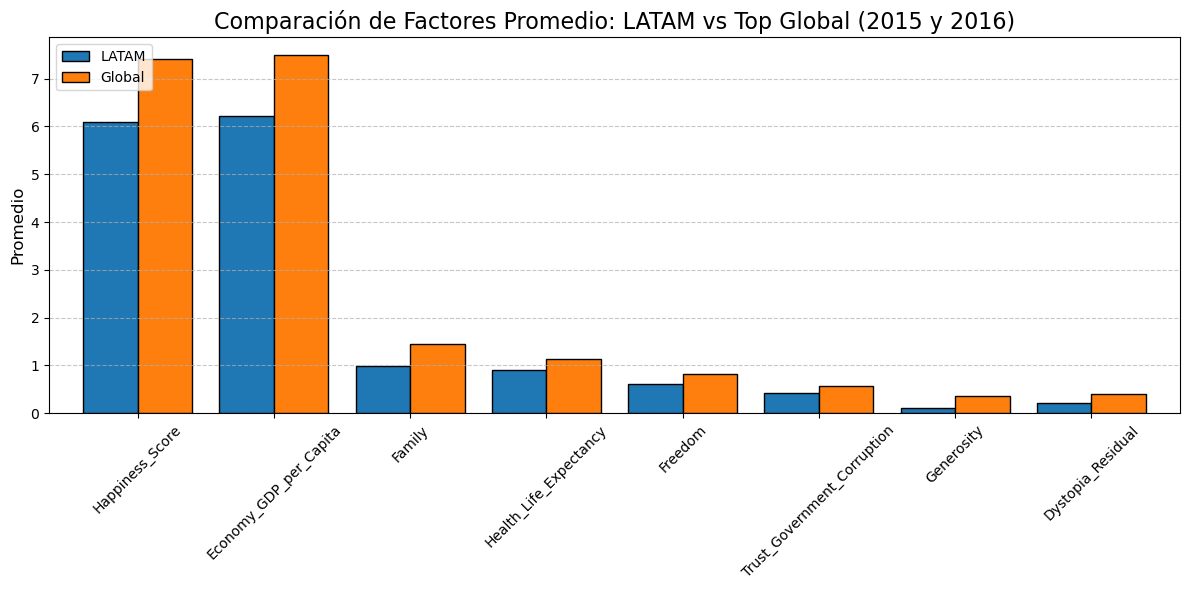

In [33]:

plt.figure(figsize=(10, 6))
comparison_df[['LATAM_Average', 'Top_Happiness_Average']].plot.bar(figsize=(12, 6), width=0.8, edgecolor='black')
plt.title('Comparación de Factores Promedio: LATAM vs Top Global (2015 y 2016)', fontsize=16)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['LATAM', 'Global'], loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Gráfico 2: Diferencia absoluta entre LATAM y Global

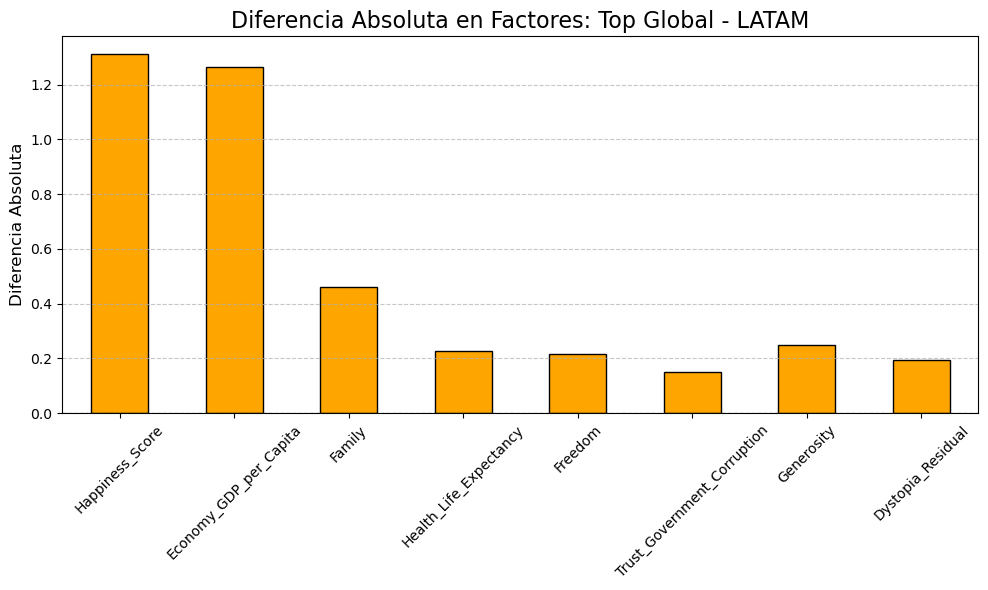

In [35]:

plt.figure(figsize=(10, 6))
comparison_df['Difference'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Diferencia Absoluta en Factores: Top Global - LATAM', fontsize=16)
plt.ylabel('Diferencia Absoluta', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Gráfico 3: Diferencia porcentual entre LATAM y Global

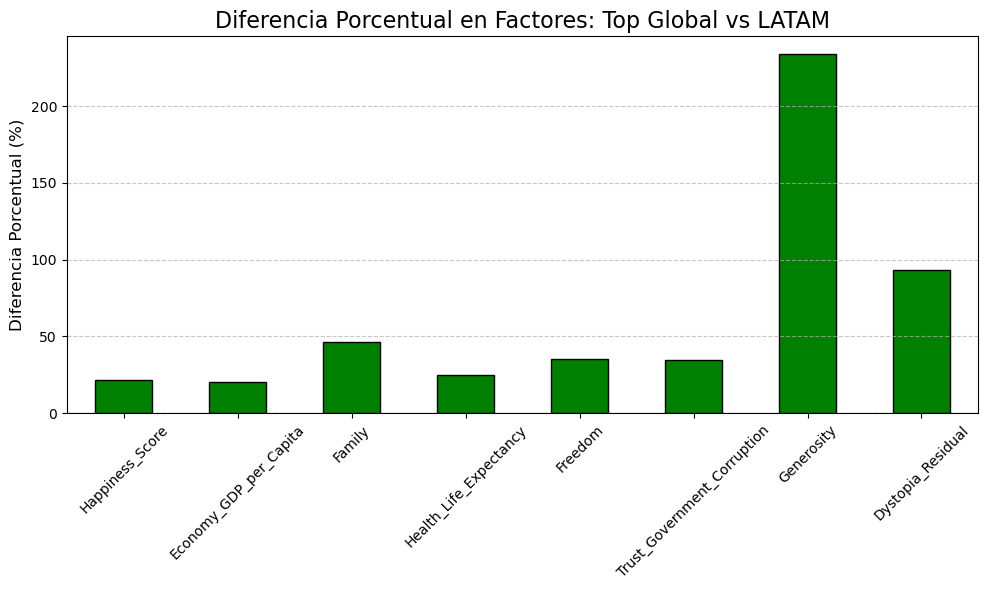

In [37]:
plt.figure(figsize=(10, 6))
comparison_df['Percentage_Difference'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Diferencia Porcentual en Factores: Top Global vs LATAM', fontsize=16)
plt.ylabel('Diferencia Porcentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
conn = sqlite3.connect('happiness_data.db')  # Ajusta la ruta si es necesario
    
# Cambiar la consulta para la región correcta
latam_data = pd.read_sql_query(f"SELECT * FROM happiness_2015 WHERE Region = 'Latin America and Caribbean'", conn)
top_happiness_data = pd.read_sql_query(f"SELECT * FROM happiness_2015 ORDER BY Happiness_Score DESC LIMIT 6", conn)  # Limitamos a los 5 primeros países globales
top_happiness_data = top_happiness_data.drop(0)
    
conn.close()

### Gráfico 4: Comparación de Happiness Score

C:\Users\santo\AppData\Local\Temp\ipykernel_15268\65528262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_data, x='Country', y='Happiness_Score', palette="Blues_d")


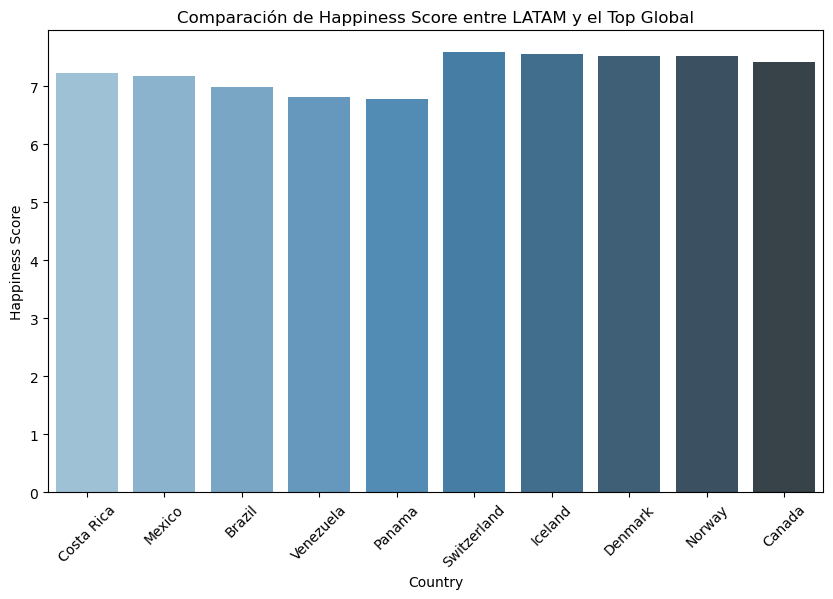

In [40]:
import seaborn as sns

# Concatenar los datos de LATAM y Top Global
latam_top_countries = latam_data.nlargest(5, 'Happiness_Score')[['Country', 'Happiness_Score']]
global_top_countries = top_happiness_data[['Country', 'Happiness_Score']].head(5)

# Unir los DataFrames de LATAM y Top Global
comparison_data = pd.concat([latam_top_countries, global_top_countries], axis=0)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_data, x='Country', y='Happiness_Score', palette="Blues_d")
plt.title('Comparación de Happiness Score entre LATAM y el Top Global')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()  # Mostrar el gráfico en el notebook


### Gráfico 5: Comparación de Happiness Score

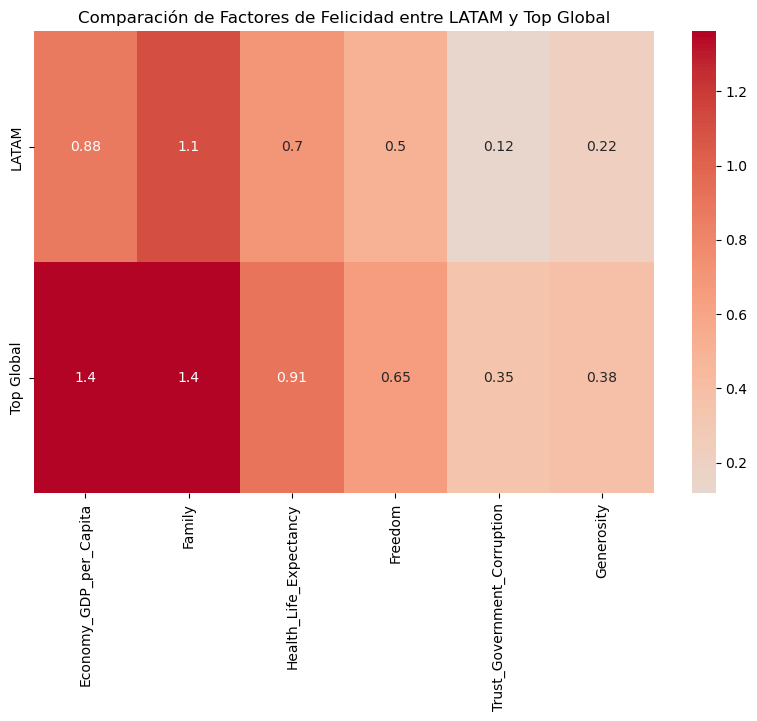

In [42]:
# Calcular la media de los factores para LATAM y Top Global
latam_avg = latam_data[['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 
                        'Freedom', 'Trust_Government_Corruption', 'Generosity']].mean()
top_avg = top_happiness_data[['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 
                              'Freedom', 'Trust_Government_Corruption', 'Generosity']].mean()

# Crear el DataFrame de comparación
comparison_df = pd.DataFrame({
    'LATAM': latam_avg,
    'Top Global': top_avg
})

# Asegurarse de que los datos sean numéricos
comparison_df = comparison_df.apply(pd.to_numeric, errors='coerce')

# Verificar si hay valores nulos y manejarlos
if comparison_df.isnull().values.any():
    print("Algunos valores son nulos y serán ignorados en el gráfico.")
    comparison_df = comparison_df.fillna(0)  # Llenar los valores nulos con 0 o con el valor que consideres adecuado

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df.T, annot=True, cmap='coolwarm', center=0)
plt.title('Comparación de Factores de Felicidad entre LATAM y Top Global')
plt.show()  # Mostrar el gráfico en el notebook
